In [36]:
#Grafo dirigido
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import numpy as np
import matplotlib

In [37]:
data = pd.read_csv('C:/Users/shiny/OneDrive/Desktop/RASFF 2021-2024.csv', sep=';', 
                   header=0, index_col = 0)

In [38]:
countries=data[['ORIG_COUNTRY','DESTIN_COUNTRY','CONCERN_COUNTRY']]

In [39]:
import networkx as nx
import pandas as pd

G = nx.DiGraph()

for index, row in countries.iterrows():
    # Convert to strings and handle NaN values
    origin = str(row['ORIG_COUNTRY']) if pd.notna(row['ORIG_COUNTRY']) else ''
    destiny = str(row['DESTIN_COUNTRY']) if pd.notna(row['DESTIN_COUNTRY']) else ''
    concern = str(row['CONCERN_COUNTRY']) if pd.notna(row['CONCERN_COUNTRY']) else ''
    
    # Split only if the string is not empty
    origin = origin.split(",") if origin else []
    destiny = destiny.split(",") if destiny else []
    concern = concern.split(",") if concern else []
    
    for i in origin:
        if i not in [" ", "INFOSAN", "Commission Services", "unknown origin", "European Food Safety Authority"]:
            for j in destiny:
                if j not in [" ", i, "INFOSAN", "Commission Services", "unknown origin", "European Food Safety Authority"]:
                    G.add_edge(i, j)
                    
                    for k in concern:
                        if k not in [" ", "INFOSAN", "Commission Services", "unknown origin", "European Food Safety Authority"]:
                            G.add_edge(j, k)
                else:
                    for k in concern:
                        if k not in [" ", "INFOSAN", "Commission Services", "unknown origin", "European Food Safety Authority"]:
                            G.add_edge(i, k)
    

In [40]:
print(G.nodes())
len(G.nodes())

['India', 'Germany', 'Peru', 'Belgium', 'Colombia', 'France', 'Italy', 'Switzerland', 'Afghanistan', 'Netherlands', 'Latvia', 'Hungary', 'Poland', 'Austria', 'Czech Republic', 'Egypt', 'Spain', 'Turkey', 'Serbia', 'Portugal', 'Malta', 'Pakistan', 'Denmark', "Côte_d'Ivoire", 'Finland', 'Croatia', 'Brazil', 'Romania', 'China', 'Estonia', 'Greece', 'Thailand', 'Ukraine', 'United Kingdom', 'United States', 'Slovenia', 'Albania', 'Morocco', 'South Africa', 'Ireland', 'Vietnam', 'Singapore', 'Russia', 'Lithuania', 'Libya', 'Bulgaria', 'Tunisia', 'Syria', 'Cyprus', 'New Zealand', 'Kenya', 'Sri Lanka', 'Oman', 'Norway', 'Republic of North Macedonia', 'Belarus', 'Slovakia', 'Senegal', 'Cameroon', 'Guinea', 'West Bank and Gaza Strip', 'Sweden', 'Ecuador', 'Luxembourg', 'Cambodia', 'Chile', 'Taiwan', 'Indonesia', 'Ghana', 'Uzbekistan', 'Uganda', 'United Arab Emirates', 'Seychelles', 'Hong Kong', 'Bangladesh', 'Nigeria', 'Venezuela', 'Iran', 'Bosnia and Herzegovina', 'Argentina', 'Liberia', 'Tanza

106

In [41]:
print(G.edges())
len(G.edges())

[('India', 'Germany'), ('India', 'Netherlands'), ('India', 'Malta'), ('India', 'France'), ('India', 'Spain'), ('India', 'Italy'), ('India', 'Belgium'), ('India', 'Cyprus'), ('India', 'Denmark'), ('India', 'Sweden'), ('India', 'Poland'), ('India', 'Switzerland'), ('India', 'Greece'), ('India', 'Croatia'), ('India', 'Austria'), ('India', 'Bulgaria'), ('India', 'Ireland'), ('India', 'Czech Republic'), ('India', 'Romania'), ('India', 'Norway'), ('Germany', 'Germany'), ('Germany', 'France'), ('Germany', 'Hungary'), ('Germany', 'Austria'), ('Germany', 'Poland'), ('Germany', 'Netherlands'), ('Germany', 'Belgium'), ('Germany', 'Lithuania'), ('Germany', 'Italy'), ('Germany', 'Czech Republic'), ('Germany', 'Spain'), ('Germany', 'Switzerland'), ('Germany', 'Sweden'), ('Germany', 'Denmark'), ('Germany', 'Bulgaria'), ('Germany', 'United Kingdom'), ('Germany', 'Finland'), ('Germany', 'Norway'), ('Germany', 'Estonia'), ('Germany', 'Luxembourg'), ('Peru', 'Belgium'), ('Peru', 'Netherlands'), ('Peru', 

598

In [7]:
nx.is_strongly_connected(G)

False

In [8]:
nx.is_weakly_connected(G)

True

In [9]:
for i in G.degree():
    print(i)

('India', 20)
('Germany', 72)
('Peru', 4)
('Belgium', 49)
('Colombia', 3)
('France', 71)
('Italy', 56)
('Switzerland', 21)
('Afghanistan', 2)
('Netherlands', 61)
('Latvia', 13)
('Hungary', 30)
('Poland', 51)
('Austria', 25)
('Czech Republic', 34)
('Egypt', 18)
('Spain', 33)
('Turkey', 23)
('Serbia', 9)
('Portugal', 8)
('Malta', 8)
('Pakistan', 10)
('Denmark', 33)
("Côte_d'Ivoire", 2)
('Finland', 25)
('Croatia', 33)
('Brazil', 7)
('Romania', 22)
('China', 23)
('Estonia', 18)
('Greece', 20)
('Thailand', 11)
('Ukraine', 11)
('United Kingdom', 18)
('United States', 8)
('Slovenia', 24)
('Albania', 5)
('Morocco', 5)
('South Africa', 6)
('Ireland', 25)
('Vietnam', 10)
('Singapore', 3)
('Russia', 5)
('Lithuania', 24)
('Libya', 1)
('Bulgaria', 13)
('Tunisia', 4)
('Syria', 3)
('Cyprus', 18)
('New Zealand', 3)
('Kenya', 6)
('Sri Lanka', 6)
('Oman', 1)
('Norway', 15)
('Republic of North Macedonia', 4)
('Belarus', 1)
('Slovakia', 16)
('Senegal', 2)
('Cameroon', 3)
('Guinea', 5)
('West Bank and Gaza

In [10]:
nx.density(G)

0.053728661275831084

In [11]:
# Si es strongly conected
nx.diameter(G)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [ ]:
degree_centrality = nx.degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

In [ ]:
degree_centrality = nx.in_degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True):
    print("%s: %s" % (key, value))

In [ ]:
degree_centrality = nx.out_degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1],reverse = True):
    print("%s: %s" % (key, value))

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G)
for key, value in sorted(eigenvector_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

India: 1.0482465346238039e-12
Peru: 1.0482465346238039e-12
Colombia: 1.0482465346238039e-12
Afghanistan: 1.0482465346238039e-12
Egypt: 1.0482465346238039e-12
Pakistan: 1.0482465346238039e-12
Côte_d'Ivoire: 1.0482465346238039e-12
Brazil: 1.0482465346238039e-12
China: 1.0482465346238039e-12
Thailand: 1.0482465346238039e-12
Albania: 1.0482465346238039e-12
Morocco: 1.0482465346238039e-12
South Africa: 1.0482465346238039e-12
Vietnam: 1.0482465346238039e-12
Russia: 1.0482465346238039e-12
Libya: 1.0482465346238039e-12
Tunisia: 1.0482465346238039e-12
Syria: 1.0482465346238039e-12
New Zealand: 1.0482465346238039e-12
Kenya: 1.0482465346238039e-12
Sri Lanka: 1.0482465346238039e-12
Oman: 1.0482465346238039e-12
Republic of North Macedonia: 1.0482465346238039e-12
Belarus: 1.0482465346238039e-12
Senegal: 1.0482465346238039e-12
Cameroon: 1.0482465346238039e-12
West Bank and Gaza Strip: 1.0482465346238039e-12
Ecuador: 1.0482465346238039e-12
Cambodia: 1.0482465346238039e-12
Chile: 1.0482465346238039e-12

In [13]:
betweenness_centrality = nx.betweenness_centrality(G)
for key, value in sorted(betweenness_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

India: 0.0
Peru: 0.0
Colombia: 0.0
Afghanistan: 0.0
Egypt: 0.0
Pakistan: 0.0
Côte_d'Ivoire: 0.0
Brazil: 0.0
China: 0.0
Thailand: 0.0
Albania: 0.0
Morocco: 0.0
South Africa: 0.0
Vietnam: 0.0
Russia: 0.0
Libya: 0.0
Tunisia: 0.0
Syria: 0.0
Cyprus: 0.0
New Zealand: 0.0
Kenya: 0.0
Sri Lanka: 0.0
Oman: 0.0
Republic of North Macedonia: 0.0
Belarus: 0.0
Senegal: 0.0
Cameroon: 0.0
Guinea: 0.0
West Bank and Gaza Strip: 0.0
Ecuador: 0.0
Cambodia: 0.0
Chile: 0.0
Taiwan: 0.0
Indonesia: 0.0
Ghana: 0.0
Uzbekistan: 0.0
Uganda: 0.0
United Arab Emirates: 0.0
Seychelles: 0.0
Hong Kong: 0.0
Bangladesh: 0.0
Nigeria: 0.0
Venezuela: 0.0
Iran: 0.0
Argentina: 0.0
Liberia: 0.0
Tanzania: 0.0
Togo: 0.0
Saudi Arabia: 0.0
Madagascar: 0.0
Northern Ireland: 0.0
Kosovo: 0.0
Canada: 0.0
Japan: 0.0
Georgia: 0.0
Costa Rica: 0.0
Algeria: 0.0
Mexico: 0.0
Dominican Republic: 0.0
Israel: 0.0
Philippines: 0.0
European Commission: 0.0
Ethiopia: 0.0
Paraguay: 0.0
Australia: 0.0
Lebanon: 0.0
Rwanda: 0.0
Guatemala: 0.0
South Kore

In [14]:
nx.average_clustering(G)

0.3733975570209069

In [15]:
clustering= nx.clustering(G)
for key, value in sorted(clustering.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Libya: 0
Oman: 0
Belarus: 0
West Bank and Gaza Strip: 0
Ghana: 0
United Arab Emirates: 0
Seychelles: 0
Nigeria: 0
Venezuela: 0
Liberia: 0
Togo: 0
Saudi Arabia: 0
Kosovo: 0
Georgia: 0
Costa Rica: 0
Algeria: 0
Dominican Republic: 0
Israel: 0
Philippines: 0
European Commission: 0
Ethiopia: 0
Australia: 0
Rwanda: 0
Guatemala: 0
South Korea: 0
Monaco: 0
Martinique: 0
Cyprus: 0.1
France: 0.12999570262140095
Malta: 0.14285714285714285
Norway: 0.14935064935064934
Germany: 0.1617340558566069
Syria: 0.16666666666666666
Netherlands: 0.17373380447585396
Croatia: 0.19389978213507625
Italy: 0.20395201129146084
Belgium: 0.20662313432835822
Greece: 0.22847682119205298
Poland: 0.2345094664371773
Finland: 0.24899598393574296
Iran: 0.25
Madagascar: 0.25
Romania: 0.2727272727272727
Lithuania: 0.27850877192982454
Czech Republic: 0.2838114754098361
Spain: 0.28540305010893247
Denmark: 0.287117903930131
Ireland: 0.31048387096774194
Egypt: 0.31699346405228757
Tunisia: 0.3333333333333333
Cambodia: 0.33333333333

In [16]:
import heapq

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get the top 5 nodes with highest closeness centrality
top_5_nodes = heapq.nlargest(5, closeness_centrality.items(), key=lambda item: item[1])

# Print the top 5 nodes
for node, centrality in top_5_nodes:
    print("%s: %s" % (node, centrality))

Germany: 0.64355474673946
France: 0.6275658089322685
Netherlands: 0.6123520923520923
Italy: 0.5874307862679955
Belgium: 0.577360544217687


In [17]:
closeness_centrality = nx.closeness_centrality(G)
for key, value in sorted(closeness_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

India: 0.0
Peru: 0.0
Colombia: 0.0
Afghanistan: 0.0
Egypt: 0.0
Pakistan: 0.0
Côte_d'Ivoire: 0.0
Brazil: 0.0
China: 0.0
Thailand: 0.0
Albania: 0.0
Morocco: 0.0
South Africa: 0.0
Vietnam: 0.0
Russia: 0.0
Libya: 0.0
Tunisia: 0.0
Syria: 0.0
New Zealand: 0.0
Kenya: 0.0
Sri Lanka: 0.0
Oman: 0.0
Republic of North Macedonia: 0.0
Belarus: 0.0
Senegal: 0.0
Cameroon: 0.0
West Bank and Gaza Strip: 0.0
Ecuador: 0.0
Cambodia: 0.0
Chile: 0.0
Taiwan: 0.0
Indonesia: 0.0
Ghana: 0.0
Uzbekistan: 0.0
Uganda: 0.0
United Arab Emirates: 0.0
Bangladesh: 0.0
Nigeria: 0.0
Venezuela: 0.0
Iran: 0.0
Argentina: 0.0
Tanzania: 0.0
Togo: 0.0
Madagascar: 0.0
Northern Ireland: 0.0
Kosovo: 0.0
Georgia: 0.0
Costa Rica: 0.0
Algeria: 0.0
Mexico: 0.0
Dominican Republic: 0.0
Israel: 0.0
Philippines: 0.0
Ethiopia: 0.0
Paraguay: 0.0
Lebanon: 0.0
Rwanda: 0.0
Guatemala: 0.0
South Korea: 0.0
Turkey: 0.009523809523809525
Martinique: 0.009523809523809525
Serbia: 0.31378290446613427
Bosnia and Herzegovina: 0.31378290446613427
European

In [18]:
weakly = nx.weakly_connected_components(G)

In [19]:
[len(c) for c in sorted(nx.weakly_connected_components(G),
                      key=len, reverse=True)]

[106]

In [20]:
weakly = nx.number_weakly_connected_components(G)

In [21]:
weakly

1

In [22]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not strongly connected.

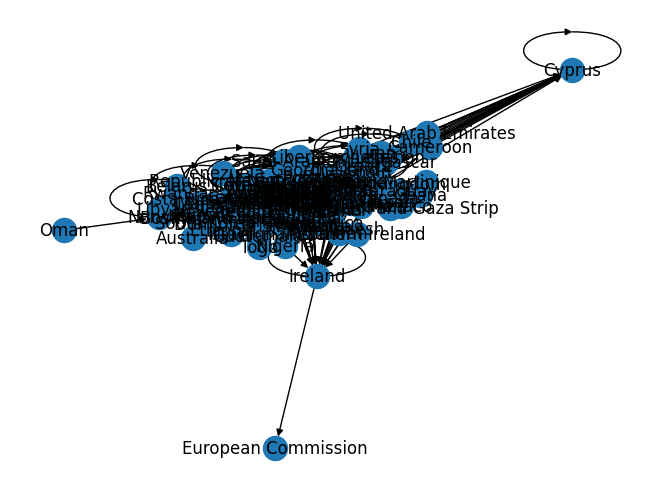

In [31]:
nx.draw(G,with_labels=True)  

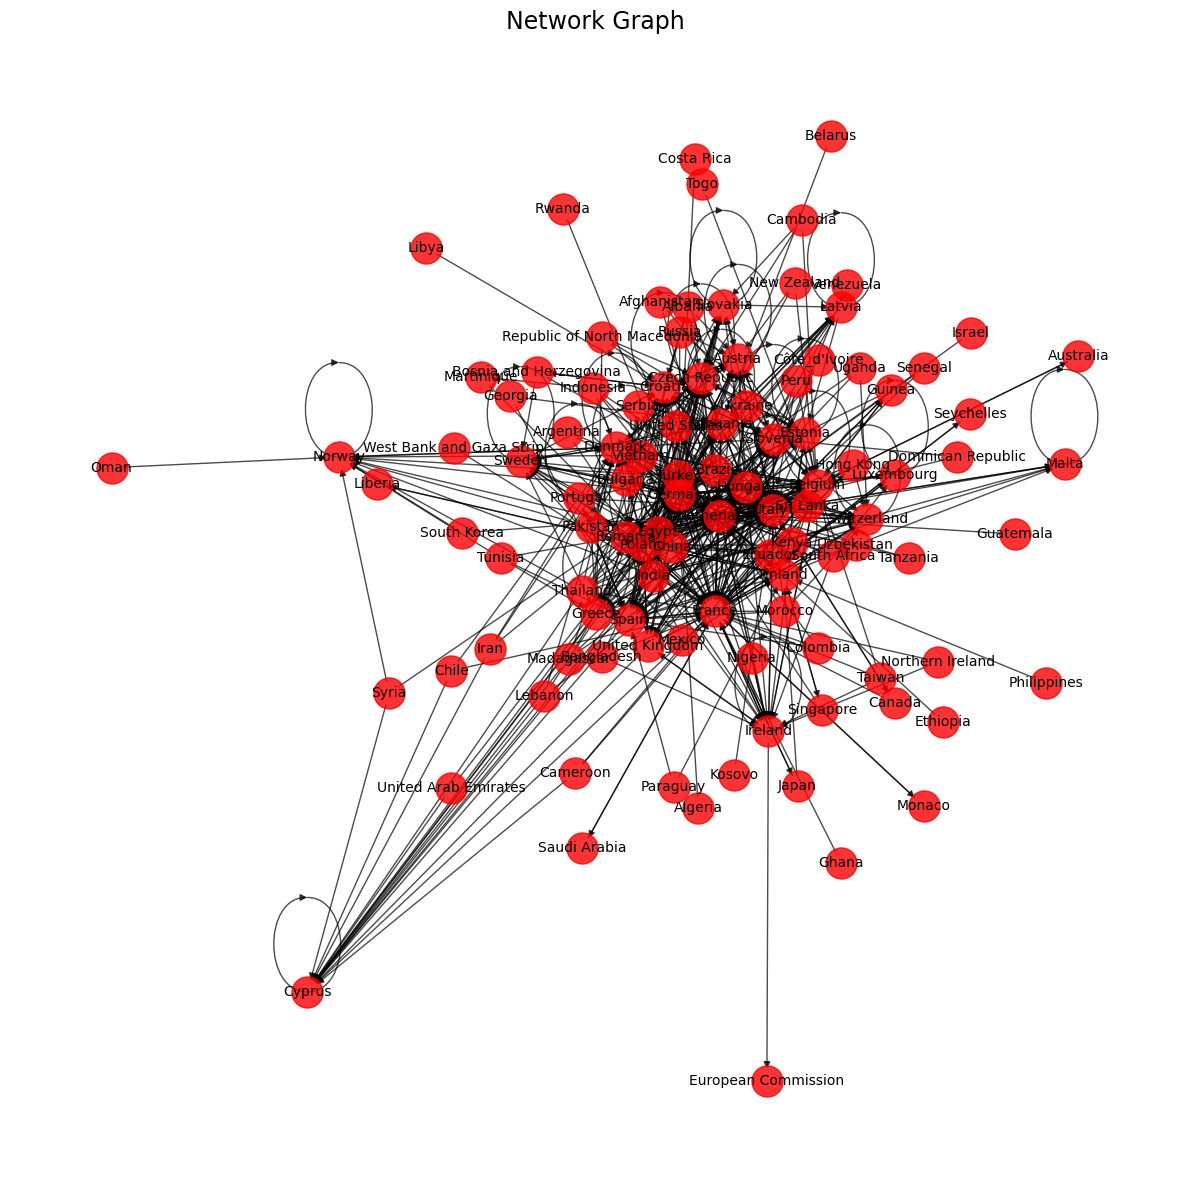

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph object
# Creating a graph layout (spring_layout provides spacing)
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Adjust k for spacing, higher k = more space between nodes

# Draw the nodes
plt.figure(figsize=(12, 12))  # Adjust figure size to avoid label overlap
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='red', alpha=0.8)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)

# Draw the labels with padding
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', verticalalignment='center')

# Customizing label positions to avoid overlap (optional)
label_pos = {k: (v[0], v[1] + 0.02) for k, v in pos.items()}  # Shifting labels upwards slightly
#nx.draw_networkx_labels(G, label_pos, font_size=9)

# Display the graph
plt.title("Network Graph", fontsize=17)
plt.axis('off')  # Hides the axis
plt.tight_layout()
plt.show()
